# M161 first question notebook- best model LogisticRegrgessionCV , 0.9929 accuracy, 111220 (all) instances, max_features=35000 vectorization, n_gram (1,2)

### Data from D:\Github\bigData\part1\joblibCache\dataTrain_cleaned.joblib
(duplicate removal and text processed already including stemming an d lemmatize)

In [4]:
import joblib

dataTrain = joblib.load(r'joblibCache\dataTrain_cleaned.joblib')
dataTrain.head()

,Id,Title,Content,Label
0,227464,come cabl groceri overlord,subscrib one three dink compar speak cabl abl ...,Entertainment
1,244074,presid react happi,presid react happi singer presid took twitter ...,Entertainment
2,60707,wildlif servic,fish wildlif servic comment period addit day p...,Technology
3,27883,launch,natur social medium often sourc real time brea...,Technology
4,169596,u new york casino,u new york casino latest news top deck world e...,Business


In [5]:
# # Stratify and keep 100000 instances based on the 'Label' column
# from sklearn.model_selection import train_test_split

# # Stratify and sample 100000 instances
# stratified_data, _ = train_test_split(
#     dataTrain,
#     train_size=100000,
#     stratify=dataTrain['Label'],
#     random_state=42
# )
# dataTrain = stratified_data.reset_index(drop=True)
# print(f"Subset shape (stratified): {dataTrain.shape}")

### Just printing out the firtst 5 columns to see what happend to text

In [6]:
print(dataTrain.info())

<class 'pandas.DataFrame'>
RangeIndex: 111220 entries, 0 to 111219
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   Id       111220 non-null  int64
 1   Title    111220 non-null  str  
 2   Content  111220 non-null  str  
 3   Label    111220 non-null  str  
dtypes: int64(1), str(3)
memory usage: 3.4 MB
None


## Starting future extraction (converting text to numbers for ML algorythms to run)





### TF-IDF Vectorization

We will now use TF-IDF vectorization instead of Bag of Words to represent the text data for classification. TF-IDF often improves performance by reducing the impact of common words and highlighting more informative terms.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine Title and Content if not already done
if 'Combined' not in dataTrain.columns:
    dataTrain['Combined'] = dataTrain['Title'].fillna('') + ' ' + dataTrain['Content'].fillna('')

# Initialize TF-IDF Vectorizer
# You can tune max_features, ngram_range, etc. for further improvement
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=35000)
dataTrain_tfidf = vectorizer.fit_transform(dataTrain['Combined'])

print('TF-IDF matrix shape:', dataTrain_tfidf.shape)
print('Feature names (first 20):', vectorizer.get_feature_names_out()[:20])

TF-IDF matrix shape: (111220, 35000)
Feature names (first 20): ['aa' 'aback' 'abandon' 'abbey' 'abdomen' 'abdomin' 'abdomin pain' 'abid'
 'abil' 'abil make' 'abil use' 'abl' 'abl access' 'abl afford' 'abl bring'
 'abl buy' 'abl captur' 'abl continu' 'abl control' 'abl creat']


### Logistic Regression with Built-in Cross-Validation (LogisticRegressionCV)

We will now use `LogisticRegressionCV` from scikit-learn, which performs cross-validated logistic regression and automatically tunes the regularization parameter.

In [8]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report

# Assume the target column is named 'Label' (change if needed)
if 'Label' not in dataTrain.columns:
    print("ERROR: 'Label' column not found in dataTrain. Please check your dataset.")
else:
    X = dataTrain_tfidf
    y = dataTrain['Label']
    clf_cv = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42,class_weight='balanced',scoring='accuracy', n_jobs= 6)
    clf_cv.fit(X, y)
    y_pred_cv = clf_cv.predict(X)
    print("Best C values per class:", clf_cv.C_)
    print('\n ***********************')
    

    print("\nClassification Report (LogisticRegressionCV, 5-fold CV):\n", classification_report(y, y_pred_cv, zero_division=0))
    
    print ('\n classification accuracy a=', clf_cv.score(X, y))
    

d:\Github\bigData\venvEnv\Lib\site-packages\sklearn\linear_model\_logistic.py:1780: FutureWarning: The default value for l1_ratios will change from None to (0.0,) in version 1.10. From version 1.10 onwards, only array-like with values in [0, 1] will be allowed, None will be forbidden. To avoid this warning, explicitly set a value, e.g. l1_ratios=(0,).
  warnings.warn(
d:\Github\bigData\venvEnv\Lib\site-packages\sklearn\linear_model\_logistic.py:1823: FutureWarning: The fitted attributes of LogisticRegressionCV will be simplified in scikit-learn 1.10 to remove redundancy. Set`use_legacy_attributes=False` to enable the new behavior now, or set it to `True` to silence this warning during the transition period while keeping the deprecated behavior for the time being. The default value of use_legacy_attributes will change from True to False in scikit-learn 1.10. See the docstring of LogisticRegressionCV for more details.
  warnings.warn(


Best C values per class: [21.5443469 21.5443469 21.5443469 21.5443469]

 ***********************

Classification Report (LogisticRegressionCV, 5-fold CV):
                precision    recall  f1-score   support

     Business       0.98      0.99      0.99     24742
Entertainment       1.00      1.00      1.00     44527
       Health       0.99      1.00      1.00     11953
   Technology       0.99      0.99      0.99     29998

     accuracy                           0.99    111220
    macro avg       0.99      0.99      0.99    111220
 weighted avg       0.99      0.99      0.99    111220


 classification accuracy a= 0.9929688904873224


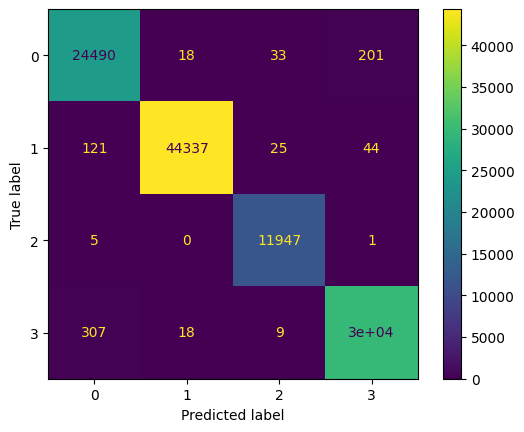

In [9]:
# Display Confusion Matrix for LogisticRegressionCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(dataTrain['Label'], y_pred_cv)
ConfusionMatrixDisplay(cm).plot()

## Writing test predictions to file testSet_categories.csv

In [10]:
import pandas as pd
import joblib 

test_data = joblib.load(r'joblibCache\dataTest_cleaned.joblib')
test_data.head()


# Combine Title and Content for test data (same as training)
test_data['Combined'] = test_data['Title'].fillna('') + ' ' + test_data['Content'].fillna('')

# Apply the same TF-IDF vectorizer to test data
test_tfidf = vectorizer.transform(test_data['Combined'])

# Predict labels using the trained classifier
test_pred = clf_cv.predict(test_tfidf)

# Prepare output DataFrame
output_df = pd.DataFrame({
    'Id': test_data['Id'],
    'Predicted': test_pred
})

# Write predictions to CSV
output_df.to_csv('testSet_categoriesLogReg.csv', index=False)
print("Predictions written to testSet_categoriesLogReg.csv")

Predictions written to testSet_categoriesLogReg.csv
